In [1]:
import os
import json
import xml.etree.ElementTree as ET

import cv2
import pandas
import openslide
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import chain
import matplotlib.pyplot as plt

from pyslide import slide, patching

In [20]:
asap_path='data/annotations/asap_annotations.xml'
imagej_path='data/annotations/imagej_annotations.xml'
json_path='data/annotations/json_annotations.json'
csv_path='data/annotations/csv_annotations.csv'

In [3]:
ndpi_path='14.90610 C L2.11.ndpi'
json_path='14.90610 C L2.11.json'
ann_obj=slide.Annotations(json_path)
annotations=ann_obj.generate_annotations()
slide_obj=slide.Slide(ndpi_path,annotations=annotations)

In [4]:
#image,border=slide_obj.detect_component()

In [5]:
border=slide_obj.get_border(space=200)

In [6]:
region,mask=slide_obj.generate_region()

x_size:12483
y_size:13228


### PySlide

In [4]:
wsi = slide.Slide('14.90610 C L2.11.ndpi')

In [5]:
wsi.detect_component()

[983, 520]
71 159 139 133
7100 21001 15890 29182


(array([[[230, 225, 224],
         [226, 220, 219],
         [226, 222, 219],
         ...,
         [238, 233, 229],
         [236, 231, 228],
         [235, 229, 229]],
 
        [[227, 222, 218],
         [228, 223, 219],
         [230, 226, 222],
         ...,
         [238, 233, 230],
         [236, 231, 228],
         [235, 229, 229]],
 
        [[229, 224, 219],
         [229, 223, 218],
         [230, 226, 221],
         ...,
         [238, 234, 230],
         [236, 231, 228],
         [236, 230, 229]],
 
        ...,
 
        [[232, 229, 224],
         [232, 229, 224],
         [233, 230, 225],
         ...,
         [237, 233, 230],
         [236, 231, 228],
         [235, 229, 229]],
 
        [[233, 230, 225],
         [232, 229, 224],
         [233, 230, 225],
         ...,
         [238, 233, 229],
         [236, 231, 228],
         [235, 229, 229]],
 
        [[234, 231, 226],
         [234, 231, 226],
         [233, 230, 225],
         ...,
         [237, 232, 228],
  

In [6]:
patch_obj=patching.Patching(wsi,mag_level=2)

In [7]:
num=patch_obj.generate_patches(256)

In [8]:
patch_obj.save('images')

[Errno 17] File exists: 'images/images'


In [9]:
num

156

### Patching

In [10]:
path='images/images'

In [11]:
s=patching.Stitching(path,name='14.90610 C L2.11.', mag_level=2)

found 156 patches
1024 4


In [12]:
s.step

256

In [13]:
image=s.stitch()

AttributeError: 'NoneType' object has no attribute 'shape'

In [18]:
image=image.astype(np.uint8)

#image=cv2.resize(image,(2000,2000))

(3072, 3328, 3)

In [22]:
xmin=min([c[0] for c in s.coords])
ymin=min([c[1] for c in s.coords])
ymax=max([c[1] for c in s.coords])

In [25]:
z=0
for i in range(xmin,xmax+512,512):
    for j in range(ymin,ymax+512,512):
        z+=1

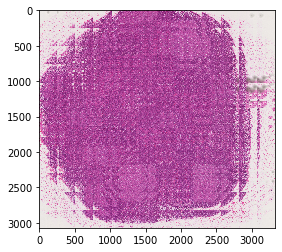

In [19]:
plt.imshow(image)

In [8]:
children = root.getchildren()

/usr/local/Cellar/python@3.7/3.7.9/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  """Entry point for launching an IPython kernel.


In [11]:
tree = ET.parse(xmlstring)
root = tree.getroot()
pixelSpacing = float(root.get('MicronsPerPixel'))

regions = {n.attrib['Name']: n[1].findall('Region') for n in root}
labelAreas = {}

In [12]:
for a in regions:

    region = {}
    for r in regions[a]:
        iD = int(r.get('Id'))
        area = r.attrib['AreaMicrons']
        length = r.attrib['LengthMicrons']
        vertices = r[1].findall('Vertex')
        f = lambda x: (int(float(x.attrib['X'])), int(float(x.attrib['Y'])))
        coords = list(map(f, vertices))
        region[iD] = dict(zip(('area', 'length', 'coords'), (area, length, coords)))
    labelAreas[a] = region

In [20]:
for k, v in labelAreas.items():
    for k2,v2 in v.items():
        print(v2)

{'area': '55105732.7', 'length': '32290.3', 'coords': [(16526, 9382), (65372, 9382), (65372, 30671), (16526, 30671)]}
{'area': '429491.7', 'length': '2727.6', 'coords': [(20942, 24654), (20908, 24654), (20891, 24654), (20875, 24654), (20841, 24654), (20807, 24654), (20773, 24654), (20756, 24654), (20723, 24654), (20672, 24654), (20655, 24654), (20638, 24654), (20621, 24654), (20605, 24654), (20588, 24654), (20571, 24654), (20554, 24654), (20520, 24654), (20503, 24654), (20470, 24654), (20453, 24671), (20419, 24671), (20402, 24688), (20385, 24688), (20351, 24722), (20318, 24722), (20284, 24739), (20250, 24756), (20250, 24773), (20233, 24773), (20200, 24773), (20149, 24789), (20132, 24823), (20115, 24823), (20081, 24840), (20065, 24857), (20031, 24874), (19997, 24874), (19997, 24891), (19980, 24908), (19930, 24924), (19879, 24941), (19845, 24975), (19795, 24992), (19761, 24992), (19744, 25009), (19710, 25026), (19693, 25043), (19660, 25059), (19626, 25093), (19609, 25093), (19592, 25110)

In [ ]:
#pixelSpacing = float(root.get('MicronsPerPixel'))

In [16]:
def oneHotToMask(onehot):
    nClasses =  onehot.shape[-1]
    idx = tf.argmax(onehot, axis=-1)
    colors = sns.color_palette('hls', nClasses)
    multimask = tf.gather(colors, idx)
    multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])
    
    return multimask

In [ ]:
import numpy as np

one=np.ones((60,60))
two=np.ones((60,60))*2
three=np.ones((60,60))*3

test=np.hstack([one,two,three])

In [ ]:
import tensorflow as tf

colors = sns.color_palette('hls', 3)

np.take_along_axis(test, colors)


#multimask = tf.gather(colors, test)
#multimask = np.where(multimask[:,:,:]==colors[0], 0, multimask[:,:,:])

In [ ]:
#from patch import Patching
from utilities import getRegions 
import openslide
from patch import Patching
import sys 
import cv2 
import numpy as np
import os

classKey = {'SINUS':1}

annotations = getRegions('U_100188_10_X_HIGH_10_L1.xml')

keys = annotations.keys()
for k in list(keys):
    if k not in classKey:
        del annotations[k]

annotations = {classKey[k]: [v2['coords'] for k2, v2 in v.items()] for k,v in annotations.items()}

print(annotations.keys())
slide = openslide.OpenSlide('U_100188_10_X_HIGH_10_L1.ndpi')
p=Patching(slide, annotations, boundaries='draw',mode='focus')
p()
#patches = p.patches
#masks = p.masks


patches = p.extract_patches()
masks = p.extract_masks()

for i, p in enumerate(patches):
    p=np.array(p.convert('RGB'))
    cv2.imwrite(os.path.join('patches', str(i) + '.png'), p)

for i, m in enumerate(masks):
    cv2.imwrite(os.path.join('masks', str(i) + '.png'), m)



'''
for i, _ in enumerate(p.patches):
    patch = p.extract_patch()
    mask = p.extract_mask()
    patch = np.array(patch)
    mask = np.array(mask)
    #print(np.unique(mask))
    cv2.imwrite(os.path.join('patches', str(i) + '.png'), patch)
    cv2.imwrite(os.path.join('masks', str(i) + '.png'), mask)


#x = p.slide_mask*255

#print(np.unique(x))
#cv2.imwrite('test.png', x)
'''
